<a href="https://colab.research.google.com/github/xiashenzhen/geemap/blob/main/geemap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

geemap 第六章分析数据

In [1]:
import ee
ee.Authenticate()
ee.Initialize(project='ee-jason2024')

In [2]:
import geemap
geemap.ee_initialize()

In [ ]:
values = ee.List.sequence(1, 10)
print(values.getInfo())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
count = values.reduce(ee.Reducer.count())
print(count.getInfo())  # 10

10


In [ ]:
min_max_value = values.reduce(ee.Reducer.minMax())
print(min_max_value.getInfo())

{'max': 10, 'min': 1}


In [ ]:
std_value = values.reduce(ee.Reducer.stdDev())
print(std_value.getInfo())  # 2.8723

2.8722813232690143


In [ ]:
min_value = values.reduce(ee.Reducer.min())
print(min_value.getInfo())

1


ImageCollection reductions

In [ ]:
Map = geemap.Map()

# Load an image collection, filtered so it's not too much data.
collection = (
    ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')
    .filterDate('2021-01-01', '2021-12-31')
    .filter(ee.Filter.eq('WRS_PATH', 44))
    .filter(ee.Filter.eq('WRS_ROW', 34))
)
# Compute the median in each band, each pixel.
# Band names are B1_median, B2_median, etc.
median = collection.reduce(ee.Reducer.median())
# The output is an Image.  Add it to the map.
vis_param = {'bands': ['B5_median', 'B4_median', 'B3_median'], 'gamma': 1.2}
Map.setCenter(-122.3355, 37.7924, 8)
Map.addLayer(median, vis_param)
Map

Map(center=[37.7924, -122.3355], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [ ]:
median = collection.median()
print(median.getInfo())
median2 = collection.reduce(ee.Reducer.median())
print(median2.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B6', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B7', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}, {'id': 'B8', 'data_type': {'type': 'PixelType', 'precision': 'float'}

In [ ]:
Map = geemap.Map()
image = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318').select(['B4', 'B3', 'B2'])
maxValue = image.reduce(ee.Reducer.max())
Map.centerObject(image, 8)
Map.addLayer(image, {}, 'Original image')
#Map.addLayer(maxValue, {'max': 13000}, 'Maximum value image')
Map

Map(center=[37.471602850590656, -122.14451407746262], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
Map = geemap.Map()
census = ee.FeatureCollection('TIGER/2010/Blocks')
benton = census.filter(
    ee.Filter.And(ee.Filter.eq('statefp10', '41'), ee.Filter.eq('countyfp10', '003'))
)
Map.setCenter(-123.27, 44.57, 13)
Map.addLayer(benton)
Map

Map(center=[44.57, -123.27], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchData…

In [ ]:
# Compute sums of the specified properties.
properties = ['pop10', 'housing10']
sums = benton.filter(ee.Filter.notNull(properties)).reduceColumns(
    **{'reducer': ee.Reducer.sum().repeat(2), 'selectors': properties}
)
sums
print(benton.aggregate_sum('pop10').getInfo())  # 85579
print(benton.aggregate_sum('housing10').getInfo())  # 36245
benton.aggregate_stats('pop10')

85579
36245


In [ ]:
Map = geemap.Map()

centroid = ee.Geometry.Point([-122.4439, 37.7538])
image = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterBounds(centroid).first()
vis = {'min': 0, 'max': 3000, 'bands': ['B5', 'B4', 'B3'], "gamma": 1.24}

Map.centerObject(centroid, 8)
Map.addLayer(image, vis, "Landsat-8")
Map

Map(center=[37.75379999999999, -122.44390000000001], controls=(WidgetControl(options=['position', 'transparent…

In [ ]:
image.propertyNames()

In [ ]:
image.get('CLOUD_COVER')  # 0.05

In [ ]:
props = geemap.image_props(image)
props

In [ ]:
stats = geemap.image_stats(image, scale=30)
stats

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

# Add NASA SRTM
dem = ee.Image('USGS/SRTMGL1_003')
dem_vis = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(dem, dem_vis, 'SRTM DEM')

# Add 5-year Landsat TOA composite
landsat = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(landsat, landsat_vis, "Landsat", False)

# Add US Census States
states = ee.FeatureCollection("TIGER/2018/States")
style = {'fillColor': '00000000'}
Map.addLayer(states.style(**style), {}, 'US States')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
out_landsat_stats = 'landsat_stats.csv'
geemap.zonal_stats(
    landsat,
    states,
    out_landsat_stats,
    statistics_type='MEAN',
    scale=1000,
    return_fc=False,
)

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

# Add NLCD data
dataset = ee.Image('USGS/NLCD_RELEASES/2019_REL/NLCD/2019')
landcover = dataset.select('landcover')
Map.addLayer(landcover, {}, 'NLCD 2019')

# Add US census states
states = ee.FeatureCollection("TIGER/2018/States")
style = {'fillColor': '00000000'}
Map.addLayer(states.style(**style), {}, 'US States')

# Add NLCD legend
Map.add_legend(title='NLCD Land Cover', builtin_legend='NLCD')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [ ]:
nlcd_stats = 'nlcd_stats.csv'

geemap.zonal_stats_by_group(
    landcover,
    states,
    nlcd_stats,
    statistics_type='SUM',
    denominator=1e6,
    decimal_places=2,
)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to /content/nlcd_stats.csv


In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
dem = ee.Image('USGS/3DEP/10m')
vis = {'min': 0, 'max': 4000, 'palette': 'terrain'}
Map.addLayer(dem, vis, 'DEM')
Map


In [ ]:
landcover = ee.Image("USGS/NLCD_RELEASES/2019_REL/NLCD/2019").select('landcover')
Map.addLayer(landcover, {}, 'NLCD 2019')
Map.add_legend(title='NLCD Land Cover Classification', builtin_legend='NLCD')

In [ ]:
stats = geemap.image_stats_by_zone(dem, landcover, reducer='MEAN')
stats

,zone,stat
0,11,164.747176
1,12,2057.655823
2,21,200.148143
3,22,234.370185
4,23,239.250334
5,24,184.145368
6,31,1161.049749
7,41,408.022819
8,42,1154.183845
9,43,295.772262


In [ ]:
stats.to_csv('mean.csv', index=False)

In [ ]:
geemap.image_stats_by_zone(dem, landcover, out_csv="std.csv", reducer='STD')

'std.csv'

In [3]:
lat_grid = geemap.latitude_grid(step=5.0, west=-180, east=180, south=-85, north=85)

In [4]:
Map = geemap.Map()
style = {'fillColor': '00000000'}
Map.addLayer(lat_grid.style(**style), {}, 'Latitude Grid')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [5]:
df = geemap.ee_to_df(lat_grid)
df

,east,north,south,west
0,180,-80,-85,-180
1,180,-75,-80,-180
2,180,-70,-75,-180
3,180,-65,-70,-180
4,180,-60,-65,-180
5,180,-55,-60,-180
6,180,-50,-55,-180
7,180,-45,-50,-180
8,180,-40,-45,-180
9,180,-35,-40,-180


In [6]:
lon_grid = geemap.longitude_grid(step=5.0, west=-180, east=180, south=-85, north=85)

In [7]:
Map = geemap.Map()
style = {'fillColor': '00000000'}
Map.addLayer(lon_grid.style(**style), {}, 'Longitude Grid')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [8]:
grid = geemap.latlon_grid(
    lat_step=10, lon_step=10, west=-180, east=180, south=-85, north=85
)
Map = geemap.Map()
style = {'fillColor': '00000000'}
Map.addLayer(grid.style(**style), {}, 'Coordinate Grid')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [9]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [10]:
roi = Map.user_roi

if roi is None:
    roi = ee.Geometry.BBox(-112.8089, 33.7306, -88.5951, 46.6244)
    Map.addLayer(roi, {}, 'ROI')
Map.centerObject(roi)

AttributeError: can't set attribute 'user_roi'

In [12]:
fishnet = geemap.fishnet(roi, h_interval=2.0, v_interval=2.0, delta=1)
style = {'color': 'blue', 'fillColor': '00000000'}
Map.addLayer(fishnet.style(**style), {}, 'Fishnet')

In [13]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [15]:
fishnet = geemap.fishnet(roi, rows=6, cols=8, delta=1)
style = {'color': 'blue', 'fillColor': '00000000'}
Map.addLayer(fishnet.style(**style), {}, 'Fishnet')

In [14]:
roi = Map.user_roi

if roi is None:
    roi = ee.Geometry.Polygon(
        [
            [
                [-64.602356, -1.127399],
                [-68.821106, -12.625598],
                [-60.647278, -22.498601],
                [-47.815247, -21.111406],
                [-43.860168, -8.913564],
                [-54.582825, -0.775886],
                [-60.823059, 0.454555],
                [-64.602356, -1.127399],
            ]
        ]
    )
    Map.addLayer(roi, {}, 'ROI')

Map.centerObject(roi)
Map

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

dem = ee.Image('USGS/SRTMGL1_003')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}

Map.addLayer(
    landsat7,
    {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200, 'gamma': 2},
    'Landsat 7',
)
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 1)
Map

In [17]:
in_shp = 'us_cities.shp'
url = 'https://github.com/giswqs/data/raw/main/us/us_cities.zip'
geemap.download_file(url)

Downloading...
From: https://github.com/giswqs/data/raw/main/us/us_cities.zip
To: /content/us_cities.zip
100%|██████████| 246k/246k [00:00<00:00, 13.0MB/s]

Extracting files...


'/content/us_cities.zip'

In [27]:
in_fc = geemap.shp_to_ee(in_shp)
Map.addLayer(in_fc, {}, 'Cities')

In [26]:
! pip install pycrs

  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32687 sha256=0123e36ba8cda8fe6cceb6068f77d2bdbda1ed76cc56e2543f434404029766ea
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


In [28]:
geemap.extract_values_to_points(in_fc, dem, out_fc="dem.shp")

Generating URL ...
Please wait ...
Data downloaded to /content/dem.shp


In [31]:
tmp_df = geemap.shp_to_gdf("dem.shp")

748.7318603382433

In [42]:
tmp_df.ELEV_IN_FT.mean(), tmp_df.ELEV_IN_FT.std(),
tmp_df.ELEV_IN_FT.value_counts().sort_values(ascending=False)

ELEV_IN_FT
10      68
7       64
20      57
13      46
23      42
        ..
4708     1
4856     1
4921     1
1909     1
1417     1
Name: count, Length: 716, dtype: int64

In [43]:
geemap.extract_values_to_points(in_fc, landsat7, 'landsat.csv')

Generating URL ...
Please wait ...
Data downloaded to /content/landsat.csv


In [44]:
 geemap.csv_to_df('landsat.csv')

,B1,B2,B3,B4,B5,B6_VCID_2,B7,system:index,STATE,ELEV_IN_FT,POP_2010,id
0,42,42,44,49,52,203,46,0,ND,1611,40888,53
1,38,35,36,53,53,203,40,1,ND,830,52838,101
2,38,38,40,49,54,200,45,2,ND,1407,15427,153
3,40,38,39,49,49,206,38,3,ND,902,105549,177
4,39,41,44,50,57,205,48,4,ND,2411,17787,192
...,...,...,...,...,...,...,...,...,...,...,...,...
3661,36,29,27,28,27,197,22,3661,NY,49,2565635,38128
3662,28,23,18,65,41,192,18,3662,NY,39,2272771,38129
3663,31,27,25,52,32,198,20,3663,NY,164,470728,38130
3664,36,31,28,36,27,193,21,3664,MA,187,28712,38138


In [45]:
Map = geemap.Map(center=[40, -100], zoom=4)
Map.add_basemap("TERRAIN")

image = ee.Image('USGS/SRTMGL1_003')
vis_params = {
    'min': 0,
    'max': 4000,
    'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
}
Map.addLayer(image, vis_params, 'SRTM DEM', True, 0.5)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [46]:
line = Map.user_roi
if line is None:
    line = ee.Geometry.LineString(
        [[-120.2232, 36.3148], [-118.9269, 36.7121], [-117.2022, 36.7562]]
    )
    Map.addLayer(line, {}, "ROI")
Map.centerObject(line)

In [ ]:
reducer = 'mean'
transect = geemap.extract_transect(
    image, line, n_segments=100, reducer=reducer, to_pandas=True
)
transect

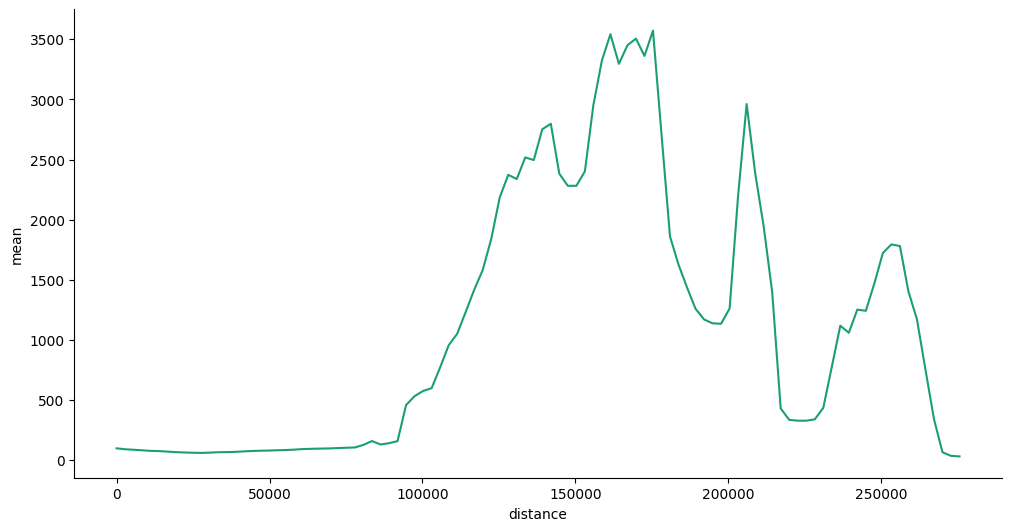

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['distance']
  ys = series['mean']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = transect.sort_values('distance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('distance')
_ = plt.ylabel('mean')

In [50]:
geemap.line_chart(
    data=transect,
    x='distance',
    y='mean',
    markers=True,
    x_label='Distance (m)',
    y_label='Elevation (m)',
    height=400,
)

In [ ]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('MODIS/061/MOD13A2')
    .filterDate('2015-01-01', '2019-12-31')
    .select('NDVI')
)

image = collection.toBands()

ndvi_vis = {
    'min': 0.0,
    'max': 9000.0,
    'palette': 'ndvi',
}

Map.addLayer(image, {}, 'MODIS NDVI Time-series')
Map.addLayer(image.select(0), ndvi_vis, 'First image')

Map

In [ ]:
dates = geemap.image_dates(collection).getInfo()
dates

In [53]:
len(dates)

115

In [ ]:
Map.set_plot_options(add_marker_cluster=True)
Map.roi_reducer = ee.Reducer.mean()
Map

In [62]:
collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
image = geemap.image_count(
    collection, region=None, start_date='2021-01-01', end_date='2022-01-01', clip=False
)

In [63]:
Map = geemap.Map()
vis = {'min': 0, 'max': 60, 'palette': 'coolwarm'}
Map.addLayer(image, vis, 'Image Count')
Map.add_colorbar(vis, label='Landsat 8 Image Count')

countries = ee.FeatureCollection(geemap.examples.get_ee_path('countries'))
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [64]:
Map = geemap.Map()

collection = ee.ImageCollection('LANDSAT/LC08/C02/T1').filterDate(
    '2021-01-01', '2022-01-01'
)

composite = ee.Algorithms.Landsat.simpleComposite(collection)

vis_params = {'bands': ['B5', 'B4', 'B3'], 'max': 128}

Map.setCenter(-122.3578, 37.7726, 10)
Map.addLayer(composite, vis_params, 'TOA composite')
Map

Map(center=[37.7726, -122.3578], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [65]:
customComposite = ee.Algorithms.Landsat.simpleComposite(
    **{'collection': collection, 'percentile': 30, 'cloudScoreRange': 5}
)

Map.addLayer(customComposite, vis_params, 'Custom TOA composite')
Map.setCenter(-105.4317, 52.5536, 11)

In [66]:
vis_params = [
    {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 128},
    {'bands': ['B5', 'B4', 'B3'], 'min': 0, 'max': 128},
    {'bands': ['B7', 'B6', 'B4'], 'min': 0, 'max': 128},
    {'bands': ['B6', 'B5', 'B2'], 'min': 0, 'max': 128},
]

labels = [
    'Natural Color (4, 3, 2)',
    'Color Infrared (5, 4, 3)',
    'Short-Wave Infrared (7, 6 4)',
    'Agriculture (6, 5, 2)',
]
geemap.linked_maps(
    rows=2,
    cols=2,
    height="300px",
    center=[37.7726, -122.1578],
    zoom=9,
    ee_objects=[composite],
    vis_params=vis_params,
    labels=labels,
    label_position="topright",
)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
countries = ee.FeatureCollection(geemap.examples.get_ee_path('countries'))
roi = countries.filter(ee.Filter.eq('ISO_A3', 'USA'))
Map.addLayer(roi, {}, 'roi')
Map

In [68]:
start_date = '2020-01-01'
end_date = '2021-01-01'
collection = (
    ee.ImageCollection('LANDSAT/LC08/C01/T1_TOA')
    .filterBounds(roi)
    .filterDate(start_date, end_date)
)

In [69]:
median = collection.median()
vis_rgb = {
    'bands': ['B4', 'B3', 'B2'],
    'min': 0,
    'max': 0.4,
}
Map.addLayer(median, vis_rgb, 'Median')
Map

Map(bottom=1854.0, center=[39.774769485295465, -91.45019531250001], controls=(WidgetControl(options=['position…

In [70]:
def add_ndvi(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

In [71]:
def add_time(image):
    date = ee.Date(image.date())

    img_date = ee.Number.parse(date.format('YYYYMMdd'))
    image = image.addBands(ee.Image(img_date).rename('date').toInt())

    img_month = ee.Number.parse(date.format('M'))
    image = image.addBands(ee.Image(img_month).rename('month').toInt())

    img_doy = ee.Number.parse(date.format('D'))
    image = image.addBands(ee.Image(img_doy).rename('doy').toInt())

    return image

In [72]:
images = collection.map(add_ndvi).map(add_time)

In [73]:
greenest = images.qualityMosaic('NDVI')

In [ ]:
greenest.bandNames()

In [ ]:
ndvi = greenest.select('NDVI')
vis_ndvi = {'min': 0, 'max': 1, 'palette': 'ndvi'}
Map.addLayer(ndvi, vis_ndvi, 'NDVI')
Map.add_colorbar(vis_ndvi, label='NDVI', layer_name='NDVI')
Map

In [79]:
vis_doy = {'palette': ['brown', 'green'], 'min': 1, 'max': 365}
Map.addLayer(greenest.select('doy'), vis_doy, 'Greenest doy')
Map.add_colorbar(vis_doy, label='Day of year', layer_name='Greenest doy')

In [77]:
Map.addLayer(greenest, vis_rgb, 'Greenest pixel')

In [78]:
vis_month = {'palette': ['red', 'blue'], 'min': 1, 'max': 12}
Map.addLayer(greenest.select('month'), vis_month, 'Greenest month')
Map.add_colorbar(vis_month, label='Month', layer_name='Greenest month')

In [ ]:
data = geemap.examples.get_path('countries.geojson')
df = geemap.geojson_to_df(data)
df.head()

In [ ]:
geemap.bar_chart(
    data=df,
    x='NAME',
    y='POP_EST',
    x_label='Country',
    y_label='Population',
    descending=True,
    max_rows=30,
    title='World Population',
    height=500,
    layout_args={'title_x': 0.5, 'title_y': 0.85},
)

In [ ]:
geemap.pie_chart(
    data=df,
    names='NAME',
    values='POP_EST',
    max_rows=30,
    height=600,
    title='World Population',
    legend_title='Country',
    layout_args={'title_x': 0.47, 'title_y': 0.87},
)

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)
collection = ee.FeatureCollection('projects/google/charts_feature_example')
Map.addLayer(collection, {}, "Ecoregions")
Map

In [92]:
features = collection.select('[0-9][0-9]_tmean|label')
df = geemap.ee_to_df(features, sort_columns=True)
df

,01_tmean,02_tmean,03_tmean,04_tmean,05_tmean,06_tmean,07_tmean,08_tmean,09_tmean,10_tmean,11_tmean,12_tmean,label
0,5.791036,7.645011,10.454658,14.251640,19.032815,23.790506,25.066577,23.845259,21.454795,15.997988,9.849321,5.641386,Desert
1,2.792467,3.609074,5.032932,7.120137,10.395376,13.776134,17.850177,17.919983,15.206573,10.081709,4.784706,2.317886,Forest
2,-3.756608,-1.990220,2.570146,7.721306,13.643875,19.033558,22.753059,21.848346,16.401770,9.263021,2.021918,-3.426706,Grassland


In [93]:
xProperty = "label"
yProperties = df.columns[:12]

labels = [
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec',
]
colors = [
    '#604791',
    '#1d6b99',
    '#39a8a7',
    '#0f8755',
    '#76b349',
    '#f0af07',
    '#e37d05',
    '#cf513e',
    '#96356f',
    '#724173',
    '#9c4f97',
    '#696969',
]
title = "Average Monthly Temperature by Ecoregion"
xlabel = "Ecoregion"
ylabel = "Temperature"

,01_tmean,02_tmean,03_tmean,04_tmean,05_tmean,06_tmean,07_tmean,08_tmean,09_tmean,10_tmean,11_tmean,12_tmean,label
0,5.791036,7.645011,10.454658,14.251640,19.032815,23.790506,25.066577,23.845259,21.454795,15.997988,9.849321,5.641386,Desert
1,2.792467,3.609074,5.032932,7.120137,10.395376,13.776134,17.850177,17.919983,15.206573,10.081709,4.784706,2.317886,Forest
2,-3.756608,-1.990220,2.570146,7.721306,13.643875,19.033558,22.753059,21.848346,16.401770,9.263021,2.021918,-3.426706,Grassland


In [94]:
options = {
    "labels": labels,
    "colors": colors,
    "title": title,
    "xlabel": xlabel,
    "ylabel": ylabel,
    "legend_location": "top-left",
    "height": "500px",
}

In [ ]:
import geemap.chart as chart
chart.feature_byFeature(features, xProperty, yProperties, **options)

In [96]:
source = ee.ImageCollection('OREGONSTATE/PRISM/Norm81m').toBands()
region = ee.Geometry.Rectangle(-123.41, 40.43, -116.38, 45.14)
samples = source.sample(region, 5000)
prop = '07_ppt'

In [97]:
options = {
    "title": 'July Precipitation Distribution for NW USA',
    "xlabel": 'Precipitation (mm)',
    "ylabel": 'Pixel count',
    "colors": ['#1d6b99'],
}

In [ ]:
chart.feature_histogram(samples, prop, **options)

In [ ]:
chart.feature_histogram(samples, prop, maxBuckets=30, **options)

In [ ]:
chart.feature_histogram(samples, prop, minBucketWidth=0.5, **options)

In [ ]:
chart.feature_histogram(samples, prop, minBucketWidth=3, maxBuckets=30, **options)